## 🏎️ Formula 1 Driver Comparison Dashboard
by Robert Kiruta-Kigozi

## Introduction
In this project, I developed an interactive dashboard to compare the performance of Max Verstappen and Lewis Hamilton at the Italian Grand Prix 2023 race. Using Python and the FastF1 library, this analysis focuses on key metrics such as average lap time, positions gained or lost.

## FastF1 Library Documentation
This project uses the **FastF1** library to load and process Formula 1 race data, including lap times, sector times, and driver positions. For more details on the FastF1 library and its methods, you can refer to the official documentation:

[FastF1 Documentation](https://theoehrly.github.io/Fast-F1/)

## Project Outline
- **Data Loading and Exploration**: Loading and examining the race data.
- **Data Analysis and Visualisations**: Analysing the drivers' performance metrics with visualisations.
- **Summary**: Concluding observations and insights from the analysis.


### Import Libraries and Set Up Cache
To start, we import the necessary libraries: `fastf1` for Formula 1 data retrieval, `pandas` for data manipulation, and `plotly.express` for visualisations. Enabling FastF1's caching feature allows us to store data locally, which speeds up data retrieval if we need to reload it.


In [100]:
pip install plotly


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [101]:
import fastf1
import pandas as pd
import plotly.express as px

### Enable Caching
To make data loading faster on repeated runs, we enable FastF1’s caching feature. This stores downloaded data locally in a cache folder, so we don’t need to redownload data every time we run the notebook.

In [102]:
fastf1.Cache.enable_cache('cache')  # Saves cached data in a 'cache' folder within your project

### Load Race Data
Now, we load data from the 2023 Italian Grand Prix. FastF1 provides data on various sessions within a race weekend, such as practice, qualifying, and the main race. Here, we focus on the main race session, denoted by `'R'`.

In [103]:
# Load the race session for the 2023 Italian Grand Prix
race_data = fastf1.get_session(2023, 'Italian Grand Prix', 'R')  # 'R' stands for Race session
race_data.load()  # Fetches race data for this session
laps_data = race_data.laps
unique_drivers = laps_data['Driver'].unique()
print("Available drivers after reloading:", unique_drivers)

Available drivers after reloading: ['VER' 'GAS' 'PER' 'ALO' 'LEC' 'STR' 'SAR' 'MAG' 'TSU' 'ALB' 'ZHO' 'HUL'
 'OCO' 'NOR' 'LAW' 'HAM' 'SAI' 'RUS' 'BOT' 'PIA']


### List of Drivers
To start our exploration, we’ll list all drivers who participated in the 2023 Italian Grand Prix. This gives us an overview of the available drivers for our comparison visualisations.

In [104]:
# Get a list of drivers who participated in the race
drivers = race_data.drivers
print("Drivers in the Race:", drivers)

Drivers in the Race: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']


### Sample Lap Data for Driver Analysis
Now, we examine lap data for a sample driver, Max Verstappen, to understand the structure of the race data. Each row represents a lap, including key information like `LapTime`, `Sector1Time`, `Sector2Time`, `Sector3Time`, and `Position`. This helps us identify which fields will be useful in our driver comparison analysis.


In [105]:
# Get lap data for Max Verstappen
laps_verstappen = race_data.laps.pick_drivers(['VER'])
laps_verstappen.head()  # Display the first few rows of lap data

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:23:49.801000,VER,1,0 days 00:01:27.905000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.666000,...,True,Red Bull Racing,0 days 01:22:21.726000,2023-09-03 13:23:22.771,1,3.0,False,,False,False
1,0 days 01:25:15.964000,VER,1,0 days 00:01:26.163000,2.0,1.0,NaT,NaT,0 days 00:00:28.274000,0 days 00:00:29.543000,...,True,Red Bull Racing,0 days 01:23:49.801000,2023-09-03 13:24:50.846,1,2.0,False,,False,True
2,0 days 01:26:41.666000,VER,1,0 days 00:01:25.702000,3.0,1.0,NaT,NaT,0 days 00:00:28.097000,0 days 00:00:29.320000,...,True,Red Bull Racing,0 days 01:25:15.964000,2023-09-03 13:26:17.009,1,2.0,False,,False,True
3,0 days 01:28:07.716000,VER,1,0 days 00:01:26.050000,4.0,1.0,NaT,NaT,0 days 00:00:28.145000,0 days 00:00:29.474000,...,True,Red Bull Racing,0 days 01:26:41.666000,2023-09-03 13:27:42.711,1,2.0,False,,False,True
4,0 days 01:29:33.892000,VER,1,0 days 00:01:26.176000,5.0,1.0,NaT,NaT,0 days 00:00:28.155000,0 days 00:00:29.514000,...,True,Red Bull Racing,0 days 01:28:07.716000,2023-09-03 13:29:08.761,1,2.0,False,,False,True


## Data Cleaning
To ensure consistency and focus on relevant metrics for driver comparison, we’ll clean the data with the following steps:
1. Create a standalone copy of the data to prevent modification warnings.
2. Convert lap and sector time columns to seconds for easier calculations.
3. Drop rows with missing values in essential lap and sector time columns.
4. Drop unnecessary columns that won’t contribute to the analysis.
5. Forward-fill missing `Position` values to retain continuity in position tracking.
6. Handle any missing values in tyre compound and stint data.
7. Handle missing values in speed columns, which are optional for this analysis.

### Step 1: Create a Copy of the Data
First, we’ll create a standalone copy of the `laps_verstappen` DataFrame. This prevents any warnings when making changes to the data and ensures that our modifications don’t unintentionally affect the original dataset.b

In [106]:
laps_verstappen = laps_verstappen.copy()

### Step 2: Convert Lap and Sector Times to Seconds
Next, we convert the `LapTime` and sector time columns (`Sector1Time`, `Sector2Time`, `Sector3Time`) from timedelta format to seconds. This simplifies calculations for metrics like average lap time and makes comparisons easier.

In [107]:
laps_verstappen['LapTimeSeconds'] = laps_verstappen['LapTime'].dt.total_seconds()
laps_verstappen['Sector1TimeSeconds'] = laps_verstappen['Sector1Time'].dt.total_seconds()
laps_verstappen['Sector2TimeSeconds'] = laps_verstappen['Sector2Time'].dt.total_seconds()
laps_verstappen['Sector3TimeSeconds'] = laps_verstappen['Sector3Time'].dt.total_seconds()

### Step 3: Drop Rows with Missing Lap and Sector Times
For accurate comparisons, we’ll drop rows where lap or sector times are missing. These columns (`LapTimeSeconds`, `Sector1TimeSeconds`, `Sector2TimeSeconds`, `Sector3TimeSeconds`) are essential for calculating average lap times and sector performances.

In [108]:
laps_verstappen = laps_verstappen.dropna(subset=['LapTimeSeconds', 'Sector1TimeSeconds', 'Sector2TimeSeconds', 'Sector3TimeSeconds'])

### Step 4: Drop Unnecessary Columns
To keep the dataset manageable, we’ll remove columns that won’t be used in our analysis. This includes columns like `Deleted`, `DeletedReason`, `FastF1Generated`, and `IsAccurate`, which don’t contribute to our driver comparison metrics.


In [109]:
laps_verstappen = laps_verstappen.drop(columns=['Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate'], errors='ignore')

### Step 5: Forward-Fill Missing Position Values
To ensure continuity in tracking position changes, we forward-fill any missing values in the `Position` column. This approach assumes that if a position value is missing, the driver’s position remains the same as in the previous lap.

In [110]:
laps_verstappen['Position'] = laps_verstappen['Position'].fillna(method='ffill')

### Step 6: Handle Missing Values in Tyre Compound and Stint Data
Tyre compound and stint data provide context on each lap's tyre type and sequence. We fill any missing values in `Compound` with 'Unknown' and in `Stint` with 0, ensuring no nulls in these relevant columns.


In [111]:
laps_verstappen['Compound'] = laps_verstappen['Compound'].fillna('Unknown')
laps_verstappen['Stint'] = laps_verstappen['Stint'].fillna(0).astype(int)

### Step 7: Handle Missing Values in Speed Columns (Optional)
Speed data columns (`SpeedI1`, `SpeedI2`, `SpeedFL`, `SpeedST`) provide additional insights but are optional for this analysis. For simplicity, we fill missing values in these columns with 0.


In [112]:
laps_verstappen['SpeedI1'] = laps_verstappen['SpeedI1'].fillna(0)
laps_verstappen['SpeedI2'] = laps_verstappen['SpeedI2'].fillna(0)
laps_verstappen['SpeedFL'] = laps_verstappen['SpeedFL'].fillna(0)
laps_verstappen['SpeedST'] = laps_verstappen['SpeedST'].fillna(0)

### Step 8: Final Check for Null Values
To confirm that our dataset is clean, we check for any remaining null values in the essential columns after our cleaning steps.

In [113]:
null_counts_cleaned = laps_verstappen.isnull().sum()
print("Remaining null values in each column:\n", null_counts_cleaned)

Remaining null values in each column:
 Time                   0
Driver                 0
DriverNumber           0
LapTime                0
LapNumber              0
Stint                  0
PitOutTime            49
PitInTime             49
Sector1Time            0
Sector2Time            0
Sector3Time            0
Sector1SessionTime     0
Sector2SessionTime     0
Sector3SessionTime     0
SpeedI1                0
SpeedI2                0
SpeedFL                0
SpeedST                0
IsPersonalBest         0
Compound               0
TyreLife               0
FreshTyre              0
Team                   0
LapStartTime           0
LapStartDate           0
TrackStatus            0
Position               0
LapTimeSeconds         0
Sector1TimeSeconds     0
Sector2TimeSeconds     0
Sector3TimeSeconds     0
dtype: int64


Pit Stop Columns (`PitOutTime` and `PitInTime`):

These columns still have null values, which is expected because not every lap involves a pit stop.

## Driver Comparison Analysis
With our data cleaned and prepared, we’re ready to analyse and compare the performance of two Formula 1 drivers in a selected race. This analysis will focus on key performance metrics such as average lap time, sector times, and position changes.

### Steps in this Section:
1. Set up driver selection to allow for a comparison between two chosen drivers.
2. Calculate summary metrics for each driver, including average lap time, sector times, and positions.
3. Visualise the comparisons using interactive charts, highlighting differences in lap-by-lap performance and sector averages.
4. Add observations to interpret the data and provide insights on driver performance.


### Step 2: Set Up Driver Selection
To enable dynamic comparisons, we’ll set up a way to select two drivers for comparison. This includes:
1. Converting lap and sector times from timedelta format to seconds for easier calculations.
2. Defining driver codes for each driver.
3. Filtering the data to create a subset for each selected driver.


In [114]:
# Convert lap and sector times to seconds for all drivers
laps_all_drivers['LapTimeSeconds'] = laps_all_drivers['LapTime'].dt.total_seconds()
laps_all_drivers['Sector1TimeSeconds'] = laps_all_drivers['Sector1Time'].dt.total_seconds()
laps_all_drivers['Sector2TimeSeconds'] = laps_all_drivers['Sector2Time'].dt.total_seconds()
laps_all_drivers['Sector3TimeSeconds'] = laps_all_drivers['Sector3Time'].dt.total_seconds()

In [115]:
# Define driver codes for the two drivers you want to compare
driver_code_1 = 'VER'  # Example: Max Verstappen
driver_code_2 = 'HAM'  # Example: Lewis Hamilton

In [116]:
# Filter data for each driver
driver_data_1 = laps_all_drivers[laps_all_drivers['Driver'] == driver_code_1]
driver_data_2 = laps_all_drivers[laps_all_drivers['Driver'] == driver_code_2]


### Step 3: Calculate Summary Metrics
In this step, we’ll calculate the following metrics for each driver:

- Average Lap Time
- Average Sector Times
- Net Position Change (from the start to the end of the race)


In [117]:
# Create copies to avoid SettingWithCopyWarning
driver_data_1 = driver_data_1.copy()
driver_data_2 = driver_data_2.copy()

# Calculate average lap and sector times for Driver 1 (VER)
avg_lap_time_1 = driver_data_1['LapTimeSeconds'].mean()
avg_sector1_time_1 = driver_data_1['Sector1TimeSeconds'].mean()
avg_sector2_time_1 = driver_data_1['Sector2TimeSeconds'].mean()
avg_sector3_time_1 = driver_data_1['Sector3TimeSeconds'].mean()

# Calculate average lap and sector times for Driver 2 (HAM)
avg_lap_time_2 = driver_data_2['LapTimeSeconds'].mean()
avg_sector1_time_2 = driver_data_2['Sector1TimeSeconds'].mean()
avg_sector2_time_2 = driver_data_2['Sector2TimeSeconds'].mean()
avg_sector3_time_2 = driver_data_2['Sector3TimeSeconds'].mean()

# Print summary metrics for average times
print(f"Average Lap Time for {driver_code_1} (Verstappen): {avg_lap_time_1:.2f} seconds")
print(f"Average Lap Time for {driver_code_2} (Hamilton): {avg_lap_time_2:.2f} seconds\n")

print(f"Average Sector 1 Time for {driver_code_1}: {avg_sector1_time_1:.2f} seconds")
print(f"Average Sector 1 Time for {driver_code_2}: {avg_sector1_time_2:.2f} seconds\n")

print(f"Average Sector 2 Time for {driver_code_1}: {avg_sector2_time_1:.2f} seconds")
print(f"Average Sector 2 Time for {driver_code_2}: {avg_sector2_time_2:.2f} seconds\n")

print(f"Average Sector 3 Time for {driver_code_1}: {avg_sector3_time_1:.2f} seconds")
print(f"Average Sector 3 Time for {driver_code_2}: {avg_sector3_time_2:.2f} seconds\n")

# Fill missing positions forward and backward
driver_data_1['Position'].fillna(method='ffill', inplace=True)
driver_data_1['Position'].fillna(method='bfill', inplace=True)

driver_data_2['Position'].fillna(method='ffill', inplace=True)
driver_data_2['Position'].fillna(method='bfill', inplace=True)

# Calculate net position change for Driver 1 (VER)
starting_position_ver = driver_data_1['Position'].iloc[0]
ending_position_ver = driver_data_1['Position'].iloc[-1]
net_position_change_ver = starting_position_ver - ending_position_ver
print(f"Net position change for {driver_code_1} (Verstappen): {net_position_change_ver}")

# Calculate net position change for Driver 2 (HAM)
starting_position_ham = driver_data_2['Position'].iloc[0]
ending_position_ham = driver_data_2['Position'].iloc[-1]
net_position_change_ham = starting_position_ham - ending_position_ham
print(f"Net position change for {driver_code_2} (Hamilton): {net_position_change_ham}")


Average Lap Time for VER (Verstappen): 86.69 seconds
Average Lap Time for HAM (Hamilton): 87.43 seconds

Average Sector 1 Time for VER: 28.60 seconds
Average Sector 1 Time for HAM: 28.64 seconds

Average Sector 2 Time for VER: 29.65 seconds
Average Sector 2 Time for HAM: 30.01 seconds

Average Sector 3 Time for VER: 28.42 seconds
Average Sector 3 Time for HAM: 28.71 seconds

Net position change for VER (Verstappen): 2.0
Net position change for HAM (Hamilton): 4.0


## Step 4: Visualisations
This section provides visual comparisons of the two drivers across different aspects of their race performance. The visualisations include:
1. **Lap Time Comparison**: To analyse consistency and speed across laps.
2. **Average Sector Times Comparison**: To see each driver's strengths in different track sectors.
3. **Position Over Time**: To track position changes throughout the race.


### Lap Time Comparison
This line chart compares the lap times of both drivers across the race. Each point represents the time taken to complete a lap, showing each driver’s consistency and speed. A lower line indicates faster lap times. Significant dips or peaks may suggest strategic changes, like pit stops or race incidents.


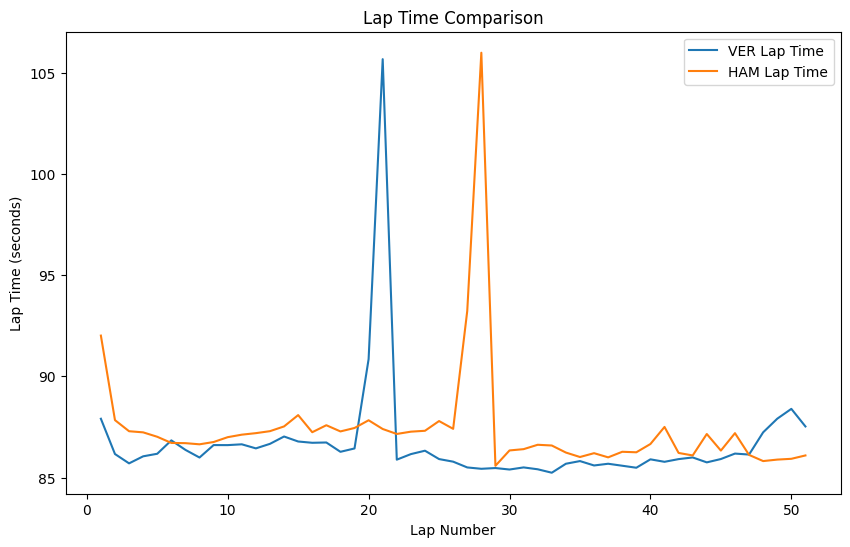

In [118]:
# Plot lap times for both drivers
plt.figure(figsize=(10, 6))
plt.plot(driver_data_1['LapNumber'], driver_data_1['LapTimeSeconds'], label=f'{driver_code_1} Lap Time')
plt.plot(driver_data_2['LapNumber'], driver_data_2['LapTimeSeconds'], label=f'{driver_code_2} Lap Time')

plt.xlabel('Lap Number')
plt.ylabel('Lap Time (seconds)')
plt.title('Lap Time Comparison')
plt.legend()
plt.show()


### Insights for Lap Time Comparison
- **Consistency**: Verstappen shows slightly more consistent lap times compared to Hamilton, generally maintaining faster laps overall.
- **Spikes in Lap Times**: Notable spikes appear around Lap 22 for Verstappen and Lap 26 for Hamilton. These may correspond to pit stops or specific race events, like safety car periods. Further investigation could confirm if these spikes align with pit stop laps.
- **Overall Performance**: The lower average lap times for Verstappen indicate a slight edge in speed, which could reflect his race strategy or car performance.


### Average Sector Times Comparison
This bar chart compares the average sector times for each driver across the race. Each sector represents a different part of the track, allowing us to see which driver was faster in each section. This helps identify areas of strength or weakness for each driver.


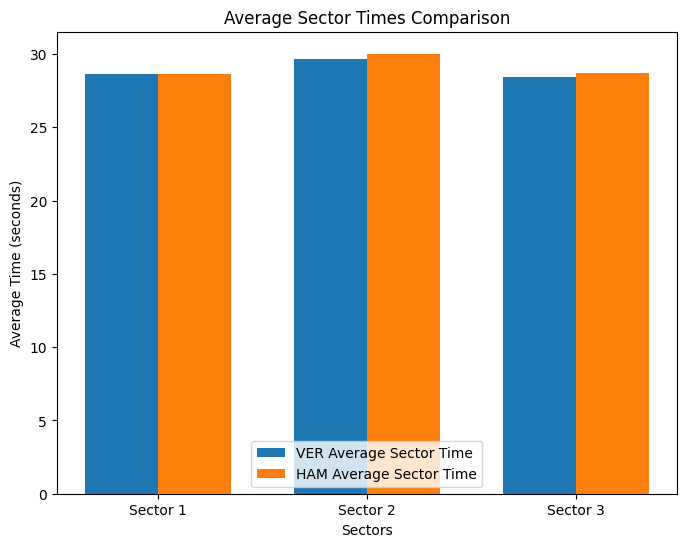

In [119]:
import numpy as np

# Data for the bar chart
sectors = ['Sector 1', 'Sector 2', 'Sector 3']
avg_sector_times_1 = [avg_sector1_time_1, avg_sector2_time_1, avg_sector3_time_1]
avg_sector_times_2 = [avg_sector1_time_2, avg_sector2_time_2, avg_sector3_time_2]

x = np.arange(len(sectors))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, avg_sector_times_1, width, label=f'{driver_code_1} Average Sector Time')
bar2 = ax.bar(x + width/2, avg_sector_times_2, width, label=f'{driver_code_2} Average Sector Time')

# Add labels and title
ax.set_xlabel('Sectors')
ax.set_ylabel('Average Time (seconds)')
ax.set_title('Average Sector Times Comparison')
ax.set_xticks(x)
ax.set_xticklabels(sectors)
ax.legend()

plt.show()


### Insights for Average Sector Times Comparison
- **Sector Strengths**: Verstappen is slightly faster in all three sectors, especially in Sector 2, which may suggest better handling or speed through that part of the track.
- **Close Performance in Sector 1**: Both drivers have very similar times in Sector 1, indicating comparable performance in that part of the track.
- **Implications**: Verstappen's overall faster sector times contribute to his lead in lap times, highlighting potential advantages in car setup or driving technique.


### Position Over Time
This line chart shows each driver’s position throughout the race. A lower line represents a better position (1st, 2nd, etc.), while higher values indicate a lower position on the track. This visualisation highlights each driver’s consistency, overtakes, and any drops in position over time. It’s especially useful for spotting critical moments where one driver gained or lost ground relative to the other.


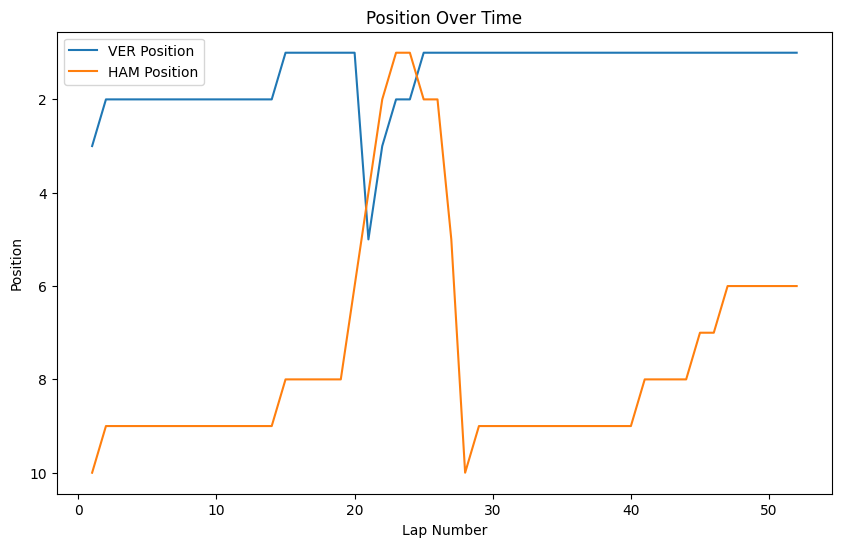

In [120]:
# Plot position over laps for both drivers
plt.figure(figsize=(10, 6))
plt.plot(driver_data_1['LapNumber'], driver_data_1['Position'], label=f'{driver_code_1} Position')
plt.plot(driver_data_2['LapNumber'], driver_data_2['Position'], label=f'{driver_code_2} Position')

plt.xlabel('Lap Number')
plt.ylabel('Position')
plt.title('Position Over Time')
plt.legend()
plt.gca().invert_yaxis()  # Lower positions (1st, 2nd) appear at the top
plt.show()


### Insights for Position Over Time
- **Starting Positions**: Hamilton starts in 10th, while Verstappen starts in 3rd, reflecting their initial grid positions and creating different strategic paths in the race.
- **Overtakes and Position Changes**: Both drivers show position fluctuations, particularly Hamilton, who makes noticeable gains from his starting position. Verstappen maintains a more stable position near the front of the pack.
- **End Position**: The position trends indicate that while Hamilton gained positions during the race, Verstappen maintained a steady lead, reflecting a more defensive or consistent race strategy.


## Conclusion
This analysis compared the race performances of Verstappen and Hamilton across several metrics, including lap times, sector times, and position changes. Key findings include:

- **Lap Times**: Verstappen consistently recorded slightly faster lap times, showing better speed and consistency overall.
- **Sector Performance**: Verstappen had the edge in all three sectors, especially in Sector 2, suggesting advantages in his race setup or technique.
- **Position Trends**: Hamilton gained positions from his starting grid position, showing his ability to overtake and advance. Verstappen maintained a steady position near the front, indicating a strong defensive strategy.

These insights highlight the strengths of each driver’s race approach and provide an in-depth view of their performance during the race.


## Limitations
While this analysis provides valuable insights into the drivers’ performances, it is essential to consider certain limitations:

- **Missing Data**: Some `Position` values were missing, which could affect the accuracy of the position trends. We used forward and backward filling to maintain continuity, but these values are assumptions rather than actual data points.
- **Context of Lap Time Spikes**: Spikes in lap times likely correspond to pit stops or safety car periods, but we do not have specific race event data to confirm these occurrences.
- **Generalisation**: This analysis is based on a single race. Results may vary across different races due to track conditions, weather, and other race-specific factors.

Acknowledging these limitations ensures that our findings are interpreted with an understanding of potential data constraints.
